In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [5]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_23-07-20_J1J2Scan/'
results_foldername = 'Results_05-10-20/'

#filenamelist = [#'NewMediumKJ1J2_Corr_L4_J20_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.0025_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.005_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.0075_folder/backup',
#                'MediumKJ1J2_Corr_L12_J20.01_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.0125_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.015_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.02_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.03_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.04_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.05_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.06_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.07_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.08_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.09_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.1_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.105_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.11_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.1125_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.115_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.12_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.13_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.14_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.15_folder/backup'
#               ]
#

filenamelist = ['Test_Crit_MediumKJ1J2_Corr_L4_J20.0001_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.001_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.002_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.003_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.004_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.005_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.006_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.007_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.008_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.009_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.01_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.011_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.012_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.013_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.014_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.015_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.016_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.017_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.018_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.019_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.02_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.025_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.03_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.035_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.04_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.045_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.05_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.055_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.06_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.065_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.07_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.075_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.08_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.085_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0875_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.09_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0925_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.095_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0975_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1025_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.105_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1075_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.11_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1125_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.115_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1175_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.12_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.125_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.13_folder/backup'
                ]
#filenamelist = [#'KJ1J2_noReps3_Corr_L4_J20.0001_folder/backup',
#               'KJ1J2_noReps3_Corr_L4_J20.007_folder/backup',
#               'KJ1J2_noReps3_Corr_L4_J20.07_folder/backup',
#               'KJ1J2_noReps3_Corr_L4_J20.13_folder/backup']
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [6]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref, idswalker]  = \
af.LoadParameters(foldername, filenamelist)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC,\
            t_h_S, t_h_Smin, t_h_Smax, MergedData] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

nb  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256] num_in_bin  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.66664962]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(25

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 3.343731E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 3.901019E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.67666667]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.67733333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.678]
Binning...Energy
 bins list for binning:  [25

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 2.842171E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 8.359326E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.67866667]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.67933333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.68]
Binning...Energy
 bins list for binning:  [256

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 8.916615E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.448950E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 6.130173E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.69]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.69333333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.69666667]
Binning...Energy
 bins list for binning:  [256

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.393221E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 2.786442E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.7]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.70333333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.70666667]
Binning...Energy
 bins list for binning:  [256,

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 2.229154E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 7.802038E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.71]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.71333333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 5.572884E-16
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.71666667]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.72]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.72333333]
Binning...Energy
 bins list for binning:  [256

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.337492E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 6.687461E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.003119E-15
  warnings.warn("Negative variances num error: %E" % err)


(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.72666667]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.72833333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.73]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 4.458307E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 3.343731E-15
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.73166667]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.73333333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.735]
Binning...Energy
 bins list for binning:  [25

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 2.229154E-15
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.73833333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.74]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.74166667]
Binning...Energy
 bins list for binning:  [256

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.226035E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 6.130173E-15
  warnings.warn("Negative variances num error: %E" % err)


(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.74333333]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
[-0.745]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  256
(192, 1)
(256, 2, 192, 1)
Binning...Energy
 bins list for binning:  [256, 128, 64, 3

Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192,

Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1)
(256, 192, 1)
(128, 192, 1)
(64, 192, 1)
(32, 192, 1)
(16, 192, 1)


In [ ]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
#tidmin = 0
#tidmax = nt
#af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername, swapst, swapsh)

In [ ]:
#af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername,failed, failedssf)

In [ ]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

In [ ]:
import importlib
importlib.reload(af)

In [ ]:
###########################################
        ## Energy ANALYSIS ##
###########################################
### Energy
S0 = np.log(2)
kw = {'gscheck': True}
for i in range(n):
    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
    plt.show()

In [ ]:
### #        ## MAGNETISATION ANALYSIS ##
############################################
af.BasicPlotsM(L, 0, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [7]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [8]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_varMeanMsq, **kw)

Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 6.71071344e-08 8.51102836e-08 1.48694539e-07]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 6.86288653e-08 9.29183233e-08 2.12546160e-07]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1,

Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 1.48029737e-17 2.89219775e-08 4.56884506e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 1.48029737e-17 3.26910073e-08 3.59584664e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1,

Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 1.48029737e-17 3.91451489e-08 3.62655539e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1, 144)
(32, 192, 1, 144)
(16, 192, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 4)
(256, 192, 1, 4)
(128, 192, 1, 4)
(64, 192, 1, 4)
(32, 192, 1, 4)
(16, 192, 1, 4)
[1.48029737e-17 1.48029737e-17 3.82984561e-08 3.38314585e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 192, 1, 144)
(256, 192, 1, 144)
(128, 192, 1, 144)
(64, 192, 1,

In [ ]:
#t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
# af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
#print(t_h_errCorrEstim[0].shape)

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
#                                   addsave = addsave,
#                                   addtitle = addtitle)

In [9]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.218;
NN1experr = 0.005;
NN1Lexperr = 0.021;

NN2exp = 0.021;
NN2experr = 0.004;
NN2Lexperr = 0.018;

NN3pexp = 0.063;
NN3pexperr = 0.005;
NN3pLexperr = 0.023;

NN3sexp = -0.003;
NN3sexperr = 0.005;
NN3sLexperr = 0.023;

mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.218
0.021
0.063
-0.003


In [ ]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

In [ ]:
import importlib
importlib.reload(af)

In [ ]:
for i in range(4):
    addsave = "J2ovJ1" +"={:4f}".format(J2[i]/J1[i])
    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,
                                   save = False, figsize = (8,6), dpi = 300, markersize = 2, alpha = 0.5)
    plt.gca().set_prop_cycle(None)
    plt.fill_between([1e-3,13],[NN1exp-NN1Lexperr,NN1exp-NN1Lexperr],[NN1exp+NN1Lexperr, NN1exp+NN1Lexperr], alpha = 0.2, label = r'$c_1^{E}$')
    plt.fill_between([1e-3,13],[NN2exp-NN2Lexperr,NN2exp-NN2Lexperr],[NN2exp+NN2Lexperr, NN2exp+NN2Lexperr], alpha = 0.2, label = r'$c_2^{E}$')
    plt.fill_between([1e-3,13],[NN3pexp-NN3pLexperr,NN3pexp-NN3pLexperr],[NN3pexp+NN3pLexperr, NN3pexp+NN3pLexperr], alpha = 0.2, label = r'$c_{3||}^{E}$')
    plt.fill_between([1e-3,13],[NN3sexp-NN3sLexperr, NN3sexp-NN3sLexperr],[NN3sexp+NN3sLexperr, NN3sexp+NN3sLexperr], alpha = 0.2, label = r'$c_{3\star}^{E}$')
    plt.xlim([0.01, 20])
    plt.ylim([-0.35, 0.6])
    plt.yticks(np.arange(-0.35,0.3,0.05))
    plt.legend(loc = 'upper center', ncol = 4)
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.pdf".format(rmexpmag))

In [ ]:
ivals = [0, 1, 2, 3 ]
figsize = (7,5)
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2,2, sharex = True, sharey = True, figsize = figsize)

axes = [ax1,ax2,ax3,ax4]
for axi, i in enumerate(ivals):
    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
    print(axes[axi])
    #axes[axi].plot([0,1],[0,0])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,
                                   save = False, figsize = figsize, dpi = 300, 
                                   createfig = False, ax = axes[axi], markersize = 3, alpha = 0.5)
    
    axes[axi].text(0.95, 0.95, addtitle,horizontalalignment='right',  transform=axes[axi].transAxes, fontsize=14,
        verticalalignment='top')

    if axi == 0 or axi == 2:
            axes[axi].set_ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    if axi == 2 or axi == 3:
        axes[axi].set_xlabel(r'$T/J_1$')
    
    axes[axi].set_prop_cycle(None)
    axes[axi].fill_between([1e-3,13],[NN1exp-NN1Lexperr,NN1exp-NN1Lexperr],[NN1exp+NN1Lexperr, NN1exp+NN1Lexperr], alpha = 0.2, label = r'$c_1^{E}$')
    axes[axi].fill_between([1e-3,13],[NN2exp-NN2Lexperr,NN2exp-NN2Lexperr],[NN2exp+NN2Lexperr, NN2exp+NN2Lexperr], alpha = 0.2, label = r'$c_2^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3pexp-NN3pLexperr,NN3pexp-NN3pLexperr],[NN3pexp+NN3pLexperr, NN3pexp+NN3pLexperr], alpha = 0.2, label = r'$c_{3||}^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3sexp-NN3sLexperr, NN3sexp-NN3sLexperr],[NN3sexp+NN3sLexperr, NN3sexp+NN3sLexperr], alpha = 0.2, label = r'$c_{3\star}^{E}$')
    axes[axi].grid(which = 'both', linestyle = '--', alpha = 0.3)
    
#
plt.xlim([0.01, 13])
plt.ylim([-0.35, 0.65])
plt.yticks(np.arange(-0.3,0.7,0.1))
#plt.legend(loc = 'upper center', ncol = 4)
plt.tight_layout(pad=0.4, w_pad=0.2, h_pad=0.5,rect = (0,0,0.88,1)) # rect =  (left, bottom, right, top),
plt.legend(loc = 'center left', bbox_to_anchor = (1.01,1.0))
plt.savefig("./" + foldername + results_foldername + "/OverviewFirstCorrelations_LargeErrors.pdf")

In [ ]:
print(foldername + results_foldername)

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
#                                   addtitle = addtitle,
#                                   save = False, log = False)
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([1e-3,60],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
#    plt.fill_between([1e-3,60],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
#    plt.fill_between([1e-3,60],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
#    plt.fill_between([1e-3,60],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
#
#    plt.xlim([0, 8])
#    plt.ylim([-0.35, 0.2])
#    plt.yticks(np.arange(-0.35,0.25,0.05))
#    plt.legend()
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom_Linear" + addsave +".png")

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
#                                   addtitle = addtitle,
#                                   save = False, log = False)
#    plt.gca().set_prop_cycle(None)
#    plt.plot([1e-3,60],[-0.179, -0.179])
#    plt.fill_between([1e-3,60],[-0.2, -0.2], [-0.157, -0.157], alpha = 0.2)
#    plt.plot([1e-3,60],[0.059, 0.059])
#    plt.fill_between([1e-3,60],[0.041, 0.041], [0.077, 0.077], alpha = 0.2)
#    plt.plot([1e-3,60],[0.1, 0.1])
#    plt.fill_between([1e-3,60],[0.076, 0.076], [0.124, 0.124], alpha = 0.2)
#    plt.plot([1e-3,60],[0.03, 0.03])
#    plt.fill_between([1e-3,60],[0.023, 0.023], [0.057, 0.057], alpha = 0.2)
#
#    #plt.xlim([3.5, 5.5])
#    plt.ylim([-0.05,0])
#    #plt.yticks(np.arange(-0.35,0.25,0.05))
#    #plt.xticks(np.arange(3.5,5.5,0.1))
#    plt.legend()
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_ZoomJ1_" + addsave +".png")
#

In [ ]:
#######################################################################
#         Temperature crossing points as a function of J2             #
#######################################################################

In [ ]:
### 1 - c2 vs c3|| - low temperature crossing

crossing_lowT_c2c3par = []
J2_lowT = []
failedcrossing_lowT_c2c3par = []
crossing_lowT_c2c3parMin = []
J2_lowT_Min = []
failedcrossing_lowT_c2c3parMin = []
crossing_lowT_c2c3parMax = []
J2_lowT_Max = []
failedcrossing_lowT_c2c3parMax = []

for i in range(n):
    Diffc2c3par = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], kind = 'linear')
    Diffc2c3parMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
    Diffc2c3parMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 200)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], 'k.',
                     xnew, Diffc2c3par(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.005, 1.6]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3par.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3par(round(solution.root, 3)), 'o', color = "red")
        J2_lowT.append(J2[i])
    except:
        failedcrossing_lowT_c2c3par.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3parMin.append(round(solution.root, 3))
        J2_lowT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_lowT_c2c3parMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3parMax.append(round(solution.root, 3))
        J2_lowT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_lowT_c2c3parMax.append(J2[i])
        countfail +=1
    if countfail == 3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')



In [ ]:
print(failedcrossing_lowT_c2c3par)

In [ ]:
print("J2_lowT_c2c3par = ", J2_lowT)
print("lowT_c2c3par = ", crossing_lowT_c2c3par)
print("J2_lowT_c2c3parMin =", J2_lowT_Min)
print("lowT_c2c3parMin =", crossing_lowT_c2c3parMin)
print("J2_lowT_c2c3parMax =", J2_lowT_Max)
print("lowT_c2c3parMax = ", crossing_lowT_c2c3parMax)

In [ ]:
print(len(J2_lowT), len(crossing_lowT_c2c3par), len(J2_lowT_Min))

In [ ]:
### 2 - c2 vs c3|| - high temperature crossing
crossing_highT_c2c3par = []
J2_highT = []
failedcrossing_highT_c2c3par = []
crossing_highT_c2c3parMin = []
J2_highT_Min = []
failedcrossing_highT_c2c3parMin = []
crossing_highT_c2c3parMax = []
J2_highT_Max = []
failedcrossing_highT_c2c3parMax = []

for i in range(n):
    Diffc2c3par = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], kind = 'linear')
    Diffc2c3parMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
    Diffc2c3parMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 300)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], 'k.',
                     xnew, Diffc2c3par(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [1.6, 7.8]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3par.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3par(round(solution.root, 3)), 'o', color = "red")
        J2_highT.append(J2[i])
    except:
        failedcrossing_highT_c2c3par.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3parMin.append(round(solution.root, 3))
        J2_highT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_highT_c2c3parMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3parMax.append(round(solution.root, 3))
        J2_highT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_highT_c2c3parMax.append(J2[i])
        countfail +=1
    if countfail >= 2:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
        
    plt.title(J2[i])
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')


In [ ]:
print("J2_highT_c2c3par = ", J2_highT)
print("highT_c2c3par = ", crossing_highT_c2c3par)
print("J2_highT_c2c3parMin = ", J2_highT_Min)
print("highT_c2c3parMin = ", crossing_highT_c2c3parMin)
print("J2_highT_c2c3parMax = ", J2_highT_Max)
print("highT_c2c3parMax = ", crossing_highT_c2c3parMax)

In [ ]:
J2_lowT

In [ ]:
### 3 - c2 vs c3* - low temperature crossing

crossing_lowT_c2c3star = []
J2_lowT = []
failedcrossing_lowT_c2c3star = []
crossing_lowT_c2c3starMin = []
J2_lowT_Min = []
failedcrossing_lowT_c2c3starMin = []
crossing_lowT_c2c3starMax = []
J2_lowT_Max = []
failedcrossing_lowT_c2c3starMax = []

for i in range(n):
    Diffc2c3star = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], kind = 'linear')
    Diffc2c3starMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
    Diffc2c3starMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 200)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], 'k.',
                     xnew, Diffc2c3star(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3starMin(xnew),Diffc2c3starMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.005, 2.5]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3star.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3star(round(solution.root, 3)), 'o', color = "red")
        J2_lowT.append(J2[i])
    except:
        failedcrossing_lowT_c2c3star.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3starMin.append(round(solution.root, 3))
        J2_lowT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_lowT_c2c3starMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3starMax.append(round(solution.root, 3))
        J2_lowT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_lowT_c2c3starMax.append(J2[i])
        countfail +=1
    if countfail == 3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')



In [ ]:
print("J2_lowT_c2c3star = ", J2_lowT)
print("lowT_c2c3star = ", crossing_lowT_c2c3star)
print("J2_lowT_c2c3starMin = ", J2_lowT_Min)
print("lowT_c2c3starMin = ", crossing_lowT_c2c3starMin)
print("J2_lowT_c2c3starMax = ", J2_lowT_Max)
print("lowT_c2c3starMax = ", crossing_lowT_c2c3starMax)

In [ ]:
### 4 - c2 vs c3* - high temperature crossing
crossing_highT_c2c3star = []
J2_highT = []
failedcrossing_highT_c2c3star = []
crossing_highT_c2c3starMin = []
J2_highT_Min = []
failedcrossing_highT_c2c3starMin = []
crossing_highT_c2c3starMax = []
J2_highT_Max = []
failedcrossing_highT_c2c3starMax = []

for i in range(n):
    Diffc2c3star = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], kind = 'linear')
    Diffc2c3starMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
    Diffc2c3starMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 300)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], 'k.',
                     xnew, Diffc2c3star(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3starMin(xnew),Diffc2c3starMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [2.5, 12.5]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3star.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3star(round(solution.root, 3)), 'o', color = "red")
        J2_highT.append(J2[i])
    except:
        failedcrossing_highT_c2c3star.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3starMin.append(round(solution.root, 3))
        J2_highT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_highT_c2c3starMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3starMax.append(round(solution.root, 3))
        J2_highT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_highT_c2c3starMax.append(J2[i])
        countfail +=1
    if countfail ==3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
        
    plt.title(J2[i])
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')


In [ ]:
print("J2_highT_c2c3star = ", J2_highT)
print("highT_c2c3star = ", crossing_highT_c2c3star)
print("J2_highT_c2c3starMin = ", J2_highT_Min)
print("highT_c2c3starMin = ", crossing_highT_c2c3starMin)
print("J2_highT_c2c3starMax = ", J2_highT_Max)
print("highT_c2c3starMax = ", crossing_highT_c2c3starMax)

In [ ]:
#######################################################################
#     Temperature crossing points as a function of J2  - vs exp       #
#######################################################################

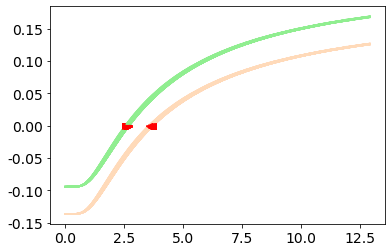

In [28]:
### 7 - c1 vs expc1 - J2 crossing

J2c1expc1 = []

TMin_c1expc1 = []
TMax_c1expc1 = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,0]-(NN1exp-NN1Lexperr)
    Diff2Max = t_h_MeanFc[i][:,0,0]-(NN1exp+NN1Lexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c1expc1.append(round(J2[i], 4))
        
        Diffc1expc1Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,0]-(NN1exp-NN1Lexperr), kind = 'linear')
        Diffc1expc1Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,0]-(NN1exp+NN1Lexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004, 8]
        #min:
        plt.plot(xnew, Diffc1expc1Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc1expc1Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Min(round(solution.root, 3)), '>', color = "red")
        except:
            TMin_c1expc1.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc1expc1Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc1expc1Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Max(round(solution.root, 3)), '<', color = "red")
        except:
            TMax_c1expc1.append(round(max(temperatures_plots[i][:]), 6))

In [29]:
print("J2c1expc1 = ", J2c1expc1)
print("TMin_c1expc1= ",TMin_c1expc1)
print("TMax_c1expc1= ",TMax_c1expc1)

J2c1expc1 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
TMin_c1expc1=  [2.71376, 2.710689, 2.713715, 2.710858, 2.710124, 2.707771, 2.70263, 2.702952, 2.708699, 2.70483, 2.708245, 2.69576, 2.696142, 2.6901, 2.690997, 2.697926, 2.695625, 2.691332, 2.692047, 2.688029, 2.689449, 2.677853, 2.670075, 2.662469, 2.657632, 2.648459, 2.647015, 2.640262, 2.632045, 2.622202, 2.621041, 2.609746, 2.6032, 2.598152, 2.594136, 2.587004, 2.590096, 2.58627, 2.582269, 2.572721, 2.568261, 2.570329, 2.565853, 2.568472, 2.563444, 2.555174, 2.553662, 2.549746, 2.550385, 2.538784]
TMax_c1expc1=  [3.73076, 3.72492, 3.727678, 3.726993, 3.723372, 3.717747, 3.721138, 3.718284, 3.713608, 3.714625, 3.713125, 3.715584, 3

(-0.01, 2.5)

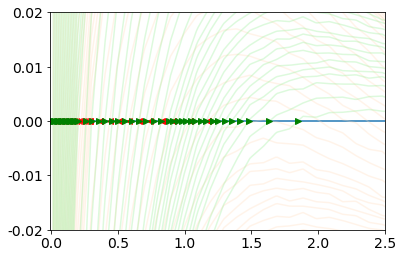

In [31]:
### 7 - c2 vs expc2 - J2 crossing

J2c2expc2 = []

TMin_c2expc2 = []
TMax_c2expc2 = []
Diff2MinTest = []
Diff2MaxTest = []
plt.plot([0, 2.5], [0,0])
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,1]-(NN2exp-NN2Lexperr)
    Diff2Max = t_h_MeanFc[i][:,0,1]-(NN2exp+NN2Lexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c2expc2.append(round(J2[i], 4))
        
        Diffc2expc2Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp-NN2Lexperr), kind = 'linear')
        Diffc2expc2Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp+NN2Lexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,1.95]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen', alpha = 0.3)
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 6)), '>', color = "green")
        except:
            TMin_c2expc2.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff', alpha = 0.3)
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 6)), '<', color = "red")
        except:
            TMax_c2expc2.append(round(max(temperatures_plots[i][:]), 6))
            

plt.ylim([-0.02, 0.02])
plt.xlim([-0.01,2.5])

In [32]:
print("J2c2expc2 = ", J2c2expc2)
print("TMin_c2expc2= ",TMin_c2expc2)
print("TMax_c2expc2= ",TMax_c2expc2)

J2c2expc2 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
TMin_c2expc2=  [0.00325, 0.010191, 0.020117, 0.030122, 0.040112, 0.050233, 0.059992, 0.070077, 0.080252, 0.090296, 0.100552, 0.110168, 0.120057, 0.130443, 0.140253, 0.150446, 0.160463, 0.170394, 0.18146, 0.190158, 0.202874, 0.259755, 0.302364, 0.358075, 0.402869, 0.457085, 0.502407, 0.55593, 0.606351, 0.659423, 0.710778, 0.76688, 0.823609, 0.879833, 0.911465, 0.946441, 0.982998, 1.010326, 1.045418, 1.074856, 1.121801, 1.1632, 1.209278, 1.251885, 1.302006, 1.351687, 1.411457, 1.478788, 1.635949, 1.848569]
TMax_c2expc2=  [12.9, 0.014619, 0.028969, 0.043374, 0.057674, 0.072266, 0.086544, 0.101105, 0.115918, 0.130398, 0.14394, 0.158953, 0

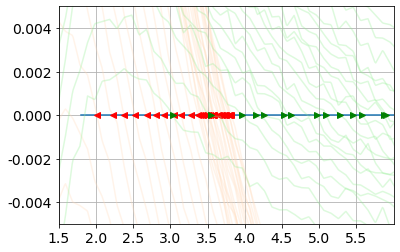

In [33]:
### 7 - c2 vs expc2 - J2 crossing

HT_J2c2expc2 = []

HT_TMin_c2expc2 = []
HT_TMax_c2expc2 = []
plt.plot([1.8, 12.5], [0,0])
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,1]-(NN2exp-NN2Lexperr)
    Diff2Max = t_h_MeanFc[i][:,0,1]-(NN2exp+NN2Lexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Max>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        HT_J2c2expc2.append(round(J2[i], 4))
        
        Diffc2expc2Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp-NN2Lexperr), kind = 'linear')
        Diffc2expc2Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp+NN2Lexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [1.85,12]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen', alpha = 0.3)
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMax_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 6)), '>', color = "green")
        except:
            HT_TMax_c2expc2.append(round(max(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff', alpha = 0.3)
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMin_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 6)), '<', color = "red")
        except:
            HT_TMin_c2expc2.append(round(min(temperatures_plots[i][:]), 6))
            
plt.ylim([-0.005, 0.005])
plt.xlim([1.5,6])
plt.xticks(np.arange(1.5, 6, 0.5))
plt.grid()

In [34]:
print(len(HT_J2c2expc2))
print(len(HT_TMin_c2expc2))
print(len(HT_TMax_c2expc2))

50
50
50


In [35]:
print("HT_J2c2expc2 = ", HT_J2c2expc2)
print("HT_TMin_c2expc2= ",HT_TMin_c2expc2)
print("HT_TMax_c2expc2= ",HT_TMax_c2expc2)

HT_J2c2expc2 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
HT_TMin_c2expc2=  [3.81914, 3.796978, 3.787884, 3.751758, 3.737936, 3.723717, 3.681308, 3.694634, 3.654275, 3.647059, 3.591357, 3.569641, 3.575255, 3.537895, 3.509024, 3.512239, 3.480603, 3.446195, 3.42519, 3.401697, 3.376778, 3.272874, 3.146527, 3.049312, 2.909459, 2.80584, 2.685693, 2.522573, 2.371869, 2.230165, 2.012715, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325]
HT_TMax_c2expc2=  [12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.

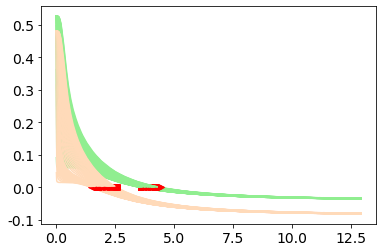

In [36]:
### 7 - c3par vs expc3par - J2 crossing

J2c3parexpc3par = []

TMin_c3parexpc3par = []
TMax_c3parexpc3par = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,2]-(NN3pexp-NN3pLexperr)
    Diff2Max = t_h_MeanFc[i][:,0,2]-(NN3pexp+NN3pLexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c3parexpc3par.append(round(J2[i], 4))
        
        Diffc3parexpc3parMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,2]-(NN3pexp-NN3pLexperr), kind = 'linear')
        Diffc3parexpc3parMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,2]-(NN3pexp+NN3pLexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,12.5]
        #min:
        plt.plot(xnew, Diffc3parexpc3parMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3parexpc3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMin(round(solution.root, 3)), '>', color = "red")
        except:
            TMin_c3parexpc3par.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3parexpc3parMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3parexpc3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMax(round(solution.root, 3)), '<', color = "red")
        except:
            TMax_c3parexpc3par.append(round(max(temperatures_plots[i][:]), 6))

In [37]:
print("J2c3parexpc3par = ", J2c3parexpc3par)
print("TMin_c3parexpc3par= ",TMin_c3parexpc3par)
print("TMax_c3parexpc3par= ",TMax_c3parexpc3par)

J2c3parexpc3par =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
TMin_c3parexpc3par=  [3.591281, 3.598443, 3.624545, 3.609194, 3.603486, 3.631029, 3.64804, 3.62216, 3.648688, 3.654202, 3.694787, 3.66863, 3.699262, 3.697702, 3.668971, 3.709851, 3.692404, 3.716122, 3.707656, 3.736457, 3.774404, 3.794872, 3.797141, 3.867704, 3.869951, 3.942507, 3.932443, 3.996188, 4.027822, 4.045941, 4.093311, 4.10133, 4.16165, 4.185352, 4.179287, 4.229046, 4.222395, 4.245451, 4.255453, 4.259133, 4.294663, 4.265823, 4.30604, 4.314832, 4.33704, 4.321872, 4.360121, 4.381676, 4.432655, 4.434566]
TMax_c3parexpc3par=  [1.489495, 1.508693, 1.523896, 1.5484, 1.556873, 1.575078, 1.591487, 1.630158, 1.622715, 1.653693, 1

In [19]:
print(J2)

[0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]


0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.0875
0.09
0.0925
0.095
0.0975
0.1
0.1025
0.105
0.1075
0.11
0.1125
0.115
0.1175
0.12
0.125
0.13


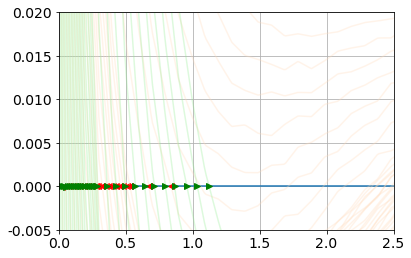

In [38]:
### 7 - c3star vs expc3star - J2 crossing

J2c3starexpc3star = []

TMin_c3starexpc3star = []
TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
plt.plot([0, 2.5], [0,0])
for i in range(1,n):
    print(J2[i])
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sLexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sLexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]<0.08: 
        J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sLexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sLexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,1.8]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'peachpuff',alpha = 0.3)
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 6)), '<', color = "red")
        except:
            TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))

        bracket = [0.004,2.5]
        #max:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'lightgreen',alpha = 0.3)
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 6)), '>', color = "green")
        except:
            TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))
            
plt.ylim([-0.005, 0.02])
plt.xlim([0,2.5])
#plt.xticks(np.arange(1.5, 6, 0.5))
plt.grid()

In [39]:
print("J2c3starexpc3star = ", J2c3starexpc3star)
print("TMin_c3starexpc3star= ",TMin_c3starexpc3star)
print("TMax_c3starexpc3star= ",TMax_c3starexpc3star)

J2c3starexpc3star =  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075]
TMin_c3starexpc3star=  [0.014409, 0.02823, 0.042532, 0.056791, 0.071184, 0.084686, 0.099833, 0.113781, 0.127232, 0.141761, 0.156343, 0.169607, 0.184307, 0.197, 0.221371, 0.236027, 0.251012, 0.265186, 0.277206, 0.288564, 0.36175, 0.429069, 0.49496, 0.573171, 0.642365, 0.715248, 0.796936, 0.865554, 0.957376, 1.035357, 1.123134]
TMax_c3starexpc3star=  [0.026672, 0.05257, 0.079775, 0.107211, 0.133259, 0.160117, 0.186413, 0.21708, 0.249103, 0.275071, 0.292093, 0.325413, 0.355089, 0.377737, 0.405425, 0.428605, 0.460704, 0.482219, 0.506714, 0.532331, 0.673149, 0.838699, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


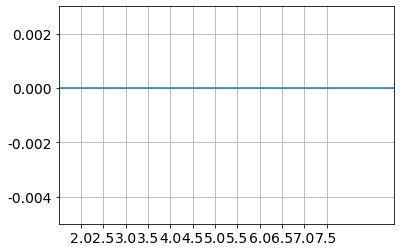

In [40]:
### 7 - c3star vs expc3star - J2 crossing

MT_J2c3starexpc3star = []

MT_TMin_c3starexpc3star = []
MT_TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []

plt.plot([0, 12.5], [0,0])
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sLexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sLexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and 0.085>J2[i]/J1[i]>0.074: 
        MT_J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sLexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sLexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [1.5, 2.6]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'lightgreen', alpha = 0.3)
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            MT_TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 6)), '>', color = "green")
        except:
            MT_TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        bracket = [2.5, 5.75]
        #plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            MT_TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 3)), '<', color = "red")
        except:
            MT_TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))
            
plt.ylim([-0.005, 0.003])
plt.xlim([1.5,9])
plt.xticks(np.arange(2,8,0.5))
plt.grid()

In [41]:
print("MT_J2c3starexpc3star = ", MT_J2c3starexpc3star)
print("MT_TMin_c3starexpc3star= ",MT_TMin_c3starexpc3star)
print("MT_TMax_c3starexpc3star= ",MT_TMax_c3starexpc3star)

MT_J2c3starexpc3star =  [0.075, 0.08]
MT_TMin_c3starexpc3star=  [0.00325, 0.00325]
MT_TMax_c3starexpc3star=  [12.9, 12.9]


(-0.05, 0.05)

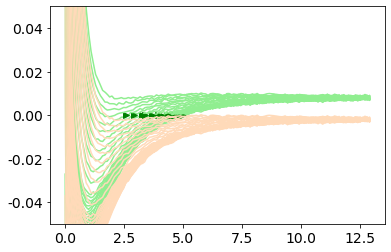

In [24]:
### 7 - c3star vs expc3star - J2 crossing

HT_J2c3starexpc3star = []

HT_TMin_c3starexpc3star = []
HT_TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]<0.07501: 
        HT_J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [1.5, 12]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 6)), '>', color = "green")
        except:
            HT_TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        bracket = [1.8, 12]
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 6)), '<', color = "red")
        except:
            HT_TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))
            
plt.ylim([-0.05, 0.05])

In [25]:
print("HT_J2c3starexpc3star = ", HT_J2c3starexpc3star)
print("HT_TMin_c3starexpc3star= ",HT_TMin_c3starexpc3star)
print("HT_TMax_c3starexpc3star= ",HT_TMax_c3starexpc3star)

HT_J2c3starexpc3star =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075]
HT_TMin_c3starexpc3star=  [4.987764, 4.950716, 4.957769, 4.857074, 4.932441, 4.97083, 4.876669, 4.791781, 4.89258, 4.730659, 4.637375, 4.629878, 4.528575, 4.567983, 4.613748, 4.542673, 4.462787, 4.327836, 4.321158, 4.329792, 4.370105, 4.077807, 3.951276, 3.685509, 3.397868, 3.254029, 2.908956, 2.569374, 0.00325, 0.00325, 0.00325, 0.00325]
HT_TMax_c3starexpc3star=  [12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


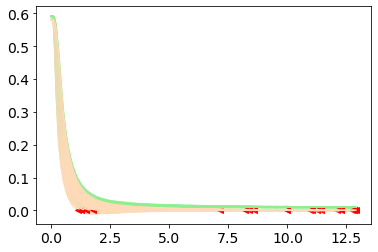

In [26]:
### 7 - c3star vs expc3star - J2 crossing

HT2_J2c3starexpc3star = []

HT2_TMin_c3starexpc3star = []
HT2_TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]>0.055: 
        HT2_J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.9, 12.9]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT2_TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 3)), '>', color = "red")
        except:
            HT2_TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT2_TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 3)), '<', color = "red")
        except:
            HT2_TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

In [27]:
print("HT2_J2c3starexpc3star = ", HT2_J2c3starexpc3star)
print("HT2_TMin_c3starexpc3star= ",HT2_TMin_c3starexpc3star)
print("HT2_TMax_c3starexpc3star= ",HT2_TMax_c3starexpc3star)

HT2_J2c3starexpc3star =  [0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
HT2_TMin_c3starexpc3star=  [1.139769, 1.270589, 1.446783, 1.74582, 7.16075, 8.371257, 8.186683, 8.59558, 11.051307, 9.969106, 11.234445, 10.962209, 11.439194, 9.973793, 12.817337, 12.09363, 12.839559, 0.00325, 12.721863, 12.287223, 12.892061, 0.00325]
HT2_TMax_c3starexpc3star=  [12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = None, setylim = None, 
#                                    setxticks = None, setyticks = None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = True, log = True)

In [ ]:
#for i in range(3):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [1, 60], setylim = [-0.02, 0.05], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_ZoomLinear.png")

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [0.01, 60], setylim = [-0.2, 0.05], 
#                                    setxticks = None, setyticks =np.arange(-0.2,0.075,0.025), 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = True)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_ZoomLog.png")

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 192, setxlim = [7,60], setylim = [-0.002, 0.01], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_Measure.png")

In [ ]:
#for i in range(3,n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [1,60], setylim = [-0.002, 0.01], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_Measure2.png")

In [ ]:
######################################################################
#                   TEMPERATURE SCAN VERSION                          #
######################################################################

In [42]:
ploth = False
tmin = 0
tmax = len(temperatures_plots[0])

In [ ]:
#### COMPUTING CORRELATIONS FROM <SISJ> AND <SI> and plotting in 2D
#
#if not ploth:
#    tid = 0
#    hid = 0
#    rid = tid
#else:
#    tid = 0
#    hid = 0
#    rid = hid
#
#[corr, errcorr, maxerr] = af.PrepPlot2DCorrelations(rid, n, 
#                                                t_h_MeanCorr,
#                                                t_h_errCorrEstim,
#                                                t_h_MeanSi,
#                                                hfields_plots,
#                                                temperatures_plots,\
#                                                ploth = ploth)
#print("t = ",temperatures_plots[0][tid])
#print("h = ",hfields_plots[0][hid])

In [ ]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r" $J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.PlotFirstCorrelations(i, L,foldername, results_foldername,  hfields_plots, temperatures_plots,
#                             t_h_MeanCorr, t_h_errCorrEstim, sref, \
#                             distmax = 2, ploth = ploth, plotFirst = True,
#                            t_h_MeanFc = t_h_MeanFc, tmin = tmin, tmax = tmax, 
#                             addtitle = addtitle, addsave = addsave, **kw)

In [ ]:
#### Values at Exp. T ####

In [43]:
Tmin = 0
Tmax = 5.75

In [44]:
idTmin = []
idTmax = []

for i in range(n):
    idTmin.append(np.abs(np.array(temperatures_plots[i])-Tmin).argmin())
    idTmax.append(np.abs(np.array(temperatures_plots[i])-Tmax).argmin())

print(idTmin)
print(idTmax)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119]


In [45]:
NN1 = []
ErrNN1 = []
NN2 = []
ErrNN2 = []
NN3par = []
ErrNN3par = []
NN3star = []
ErrNN3star = []
for i in range(n):
    #for idT in range(idTmin, idTmax):
    NN1.append(t_h_MeanFc[i][idTmin[i]:idTmax[i]+1,0,0])
    ErrNN1.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i]+1,0,0]))
    NN2.append(t_h_MeanFc[i][idTmin[i]:idTmax[i]+1,0,1])
    ErrNN2.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i]+1,0,1]))
    NN3par.append(t_h_MeanFc[i][idTmin[i]:idTmax[i]+1,0,2])
    ErrNN3par.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i]+1,0,2]))
    NN3star.append(t_h_MeanFc[i][idTmin[i]:idTmax[i]+1,0,3])
    ErrNN3star.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i]+1,0,3]))

NN1 = np.array(NN1).transpose()
ErrNN1 = np.array(ErrNN1).transpose()

NN2 = np.array(NN2).transpose()
ErrNN2 = np.array(ErrNN2).transpose()

NN3par = np.array(NN3par).transpose()
ErrNN3par = np.array(ErrNN3par).transpose()

NN3star = np.array(NN3star).transpose()
ErrNN3star = np.array(ErrNN3star).transpose()

In [46]:
NN1.shape

(120, 50)

In [ ]:
#for idT in range(idTmax[0]-idTmin[0]):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.2f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.275, 0.15])
#    plt.xlim([0,0.15])
#    plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.grid(which = 'both')
#    plt.legend(loc='best')
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_T={:.4f}.png".format(temperatures_plots[0][idTmin[0]+idT]))

In [ ]:
#for idT in range(idTmax[0]-idTmin[0]):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([0,0.15],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = r"$c_1$ - exp")
#    plt.fill_between([0,0.15],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = r"$c_2$ - exp")
#    plt.fill_between([0,0.15],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = r"$c_{3 ||}$ - exp")
#    plt.fill_between([0,0.15],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = r"$c_{3 \star}$ - exp")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.35, 0.65])
#    plt.xlim([0,0.13])
#    plt.yticks(np.arange(-0.35, 0.7, 0.05))
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))

In [ ]:
### 5 - c2 vs c3|| - J2 crossing

crossing_c2c3par = []
Tcrossing = []
Tfailedcrossing_c2c3par = []
crossing_c2c3parMin = []
TMinCrossing = []
Tfailedcrossing_c2c3parMin = []
crossing_c2c3parMax = []
TMaxCrossing = []
Tfailedcrossing_c2c3parMax = []
plt.plot([0,0.125],[0,0])
for idT in range(idTmax[0]-idTmin[0]+1):
    Diffc2c3par = interp1d(J2,  NN2[idT,:]-NN3par[idT,:], kind = 'linear')
    Diffc2c3parMin = interp1d(J2, 
                            NN2[idT,:]-NN3par[idT,:]-np.sqrt(ErrNN2[idT,:]), kind = 'linear')
    Diffc2c3parMax = interp1d(J2, 
                            NN2[idT,:]-NN3par[idT,:]+np.sqrt(ErrNN2[idT,:]), kind = 'linear')
   
    xnew = np.linspace(min(J2), max(J2), 1000)
    
    #plt.figure()
    #plt.plot([min(J2), max(J2)], [0, 0], color = 'orange')
    #plt.plot(J2,  NN2[idT,:]-NN3par[idT,:], 'k.',
    #                 xnew, Diffc2c3par(xnew), '-')
    #
    #plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.0008, 0.125]
    countfail = 0
    plt.plot(xnew, Diffc2c3par(xnew), '-', color = 'lightblue', alpha = 0.2)
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, rtol = 1e-8)#, method = 'bisect')
        if solution.converged:
            crossing_c2c3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2c3par(round(solution.root, 6)), 'o', color = "red")
            Tcrossing.append(round(temperatures_plots[0][idT], 4))
    except:
        Tfailedcrossing_c2c3par.append(temperatures_plots[0][idT])
        countfail +=1
    #min:
    #plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightgreen')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, rtol = 1e-4)#, method = 'bisect')
        crossing_c2c3parMin.append(round(solution.root, 6))
        TMinCrossing.append(round(temperatures_plots[0][idT], 4))
        plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 6)), '>', color = "green")
    except:
        Tfailedcrossing_c2c3parMin.append(temperatures_plots[0][idT])
        countfail +=1
        
    #max:
    #plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'peachpuff')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, rtol = 1e-4)#, method = 'bisect')
        crossing_c2c3parMax.append(round(solution.root, 6))
        TMaxCrossing.append(round(temperatures_plots[0][idT], 4))
        plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 6)), '<', color = "red")
    except:
        Tfailedcrossing_c2c3parMax.append(temperatures_plots[0][idT])
        countfail +=1
    #if countfail == 3:
    #    #plt.ylim([-0.003, 0.003])
    #else:
    #    #plt.ylim([-1, 1])
    #plt.title('T={0}'.format(temperatures_plots[0][idT]))
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')
    
plt.xlim([0,0.02])
plt.ylim([-0.002, 0.002])

In [ ]:
print("T_c2c3par = ", Tcrossing)
print("J2_c2c3par = ", crossing_c2c3par)
print("T_c2c3parMin = ", TMinCrossing)
print("J2_c2c3parMin = ", crossing_c2c3parMin)
print("T_c2c3parMax = ", TMaxCrossing)
print("J2_c2c3parMax = ", crossing_c2c3parMax)

In [ ]:
### 6 - c2 vs c3* - J2 crossing

crossing_c2c3star = []
Tcrossing = []
Tfailedcrossing_c2c3star = []
crossing_c2c3starMin = []
TMinCrossing = []
Tfailedcrossing_c2c3starMin = []
crossing_c2c3starMax = []
TMaxCrossing = []
Tfailedcrossing_c2c3starMax = []
plt.plot([0,0.125],[0,0])
for idT in range(idTmax[0]-idTmin[0]+1):
    Diffc2c3star = interp1d(J2,  NN2[idT,:]-NN3star[idT,:], kind = 'linear')
    Diffc2c3starMin = interp1d(J2, 
                            NN2[idT,:]-NN3star[idT,:]-np.sqrt(ErrNN2[idT,:]+ErrNN3star[idT,:]), kind = 'linear')
    Diffc2c3starMax = interp1d(J2, 
                            NN2[idT,:]-NN3star[idT,:]+np.sqrt(ErrNN2[idT,:]+ErrNN3star[idT,:]), kind = 'linear')
   
    xnew = np.linspace(min(J2), max(J2), 1000)
    
    
    #middle:
    bracket = [0.0001, 0.125]
    countfail = 0
    plt.plot(xnew, Diffc2c3star(xnew), '-', color = 'lightblue', alpha = 0.3)
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-6)#, method = 'bisect')
        crossing_c2c3star.append(round(solution.root, 6))
        plt.plot(solution.root, Diffc2c3star(round(solution.root, 6)), 'o', color = "red")
        Tcrossing.append(round(temperatures_plots[0][idT], 4))
    except:
        Tfailedcrossing_c2c3star.append(temperatures_plots[0][idT])
        countfail +=1
    #min:
    #plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3starMin.append(round(solution.root, 6))
        TMinCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        Tfailedcrossing_c2c3starMin.append(temperatures_plots[0][idT])
        countfail +=1
        
    #max:
    #plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3starMax.append(round(solution.root, 6))
        TMaxCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        Tfailedcrossing_c2c3starMax.append(temperatures_plots[0][idT])
        countfail +=1
    #if countfail == 3:
    #    #plt.ylim([-0.003, 0.003])
    #else:
    #    #plt.ylim([-1, 1])
    #plt.title('T={0}'.format(temperatures_plots[0][idT]))
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')



In [ ]:
print("T_c2c3star = ", Tcrossing)
print("J2_c2c3star = ", crossing_c2c3star)
print("T_c2c3starMin = ", TMinCrossing)
print("J2_c2c3starMin = ", crossing_c2c3starMin)
print("T_c2c3starMax = ", TMaxCrossing)
print("J2_c2c3starMax = ", crossing_c2c3starMax)

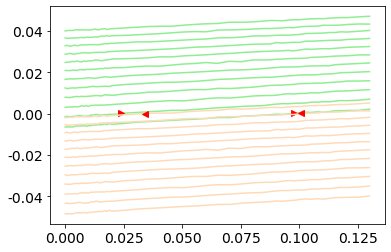

In [47]:
### 7 - c1 vs expc1 - J2 crossing

Tc1expc1 = []

J2Min_c1expc1 = []
J2Max_c1expc1 = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]+1):
    
    Diff2Min = NN1[idT,:]-(NN1exp-NN1Lexperr)
    Diff2Max = NN1[idT,:]-(NN1exp+NN1Lexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        idT
        Tc1expc1.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc1expc1Min = interp1d(J2, 
                               NN1[idT,:]-(NN1exp-NN1Lexperr), kind = 'linear')
        Diffc1expc1Max = interp1d(J2, 
                               NN1[idT,:]-(NN1exp+NN1Lexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 1000)

           #middle:
        bracket = [0.0001, 0.12]
        #min:
        plt.plot(xnew, Diffc1expc1Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc1expc1Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Min(round(solution.root, 3)), '>', color = "red")
        except:
            J2Min_c1expc1.append(round(min(J2), 6))

        #max:
        plt.plot(xnew, Diffc1expc1Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc1expc1Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Max(round(solution.root, 3)), '<', color = "red")
        except:
            J2Max_c1expc1.append(round(max(J2), 6))
 

In [48]:
print("Tc1expc1 = ", Tc1expc1)
print("J2Min_c1expc1= ",J2Min_c1expc1)
print("J2Max_c1expc1= ",J2Max_c1expc1)

Tc1expc1 =  [2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727]
J2Min_c1expc1=  [0.097754, 0.023839, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
J2Max_c1expc1=  [0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.100697, 0.033996]


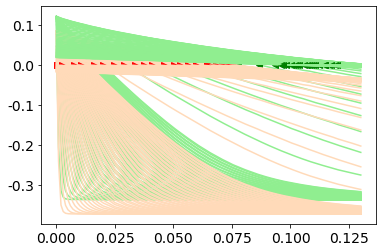

In [49]:
### 8 - c2 vs expc2 - J2 crossing
Tc2expc2 = []

J2Min_c2expc2 = []
J2Max_c2expc2 = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]+1):
    
    Diff2Min = NN2[idT,:]-(NN2exp-NN2Lexperr)
    Diff2Max = NN2[idT,:]-(NN2exp+NN2Lexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc2expc2.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc2expc2Min = interp1d(J2, 
                               NN2[idT,:]-(NN2exp-NN2Lexperr), kind = 'linear')
        Diffc2expc2Max = interp1d(J2, 
                               NN2[idT,:]-(NN2exp+NN2Lexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 1000)

        #middle:
        bracket = [0.0001, 0.12]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 6)), '<', color = "green")
        except:
            J2Max_c2expc2.append(round(max(J2), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 6)), '>', color = "red")
        except:
            J2Min_c2expc2.append(round(min(J2), 6))
 

In [50]:
len(J2Min_c2expc2)
len(J2Max_c2expc2)

120

In [51]:
print("Tc2expc2 = ", Tc2expc2)
print("J2Min_c2expc2= ",J2Min_c2expc2)
print("J2Max_c2expc2= ",J2Max_c2expc2)

Tc2expc2 =  [0.0032, 0.0064, 0.0095, 0.0126, 0.0157, 0.0189, 0.022, 0.0251, 0.0282, 0.0314, 0.0345, 0.0376, 0.0407, 0.0438, 0.047, 0.0501, 0.0532, 0.0563, 0.0595, 0.0626, 0.0657, 0.0688, 0.072, 0.0751, 0.0782, 0.0813, 0.0844, 0.0876, 0.0907, 0.0938, 0.0969, 0.1001, 0.1032, 0.1063, 0.1094, 0.1126, 0.1157, 0.1188, 0.1219, 0.125, 0.1282, 0.1313, 0.1344, 0.1375, 0.1407, 0.1438, 0.1469, 0.15, 0.1532, 0.1563, 0.1594, 0.1625, 0.1656, 0.1688, 0.1719, 0.175, 0.1781, 0.1813, 0.1844, 0.1875, 0.1906, 0.1938, 0.1969, 0.2, 0.2992, 0.3984, 0.4977, 0.5969, 0.6961, 0.7953, 0.8945, 0.9938, 1.093, 1.1922, 1.2914, 1.3906, 1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672, 4.4664, 4.5656, 4.6648, 4.7641, 4.8633, 4.9625, 5.0617, 5.1609, 5.2602, 5.3594, 5.4586, 5.5578, 5.657, 5.7563]
J2Min_c2expc2=  [0.000244, 0.000454, 0.000

In [ ]:
max(J2)

(0, 0.13)

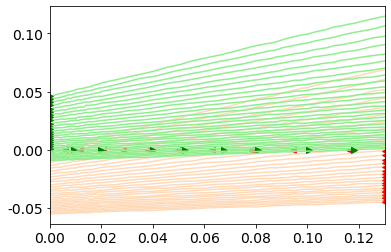

In [102]:
### 9 - c3// vs expc3// - J2 crossing

Tc3parexpc3par = []

J2Min_c3parexpc3par = []
J2Max_c3parexpc3par = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]+1):
    
    Diff2Min = NN3par[idT,:]-(NN3pexp-NN3pLexperr)
    Diff2Max = NN3par[idT,:]-(NN3pexp+NN3pLexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc3parexpc3par.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc3parexpc3parMin = interp1d(J2, 
                               NN3par[idT,:]-(NN3pexp-NN3pLexperr), kind = 'linear')
        Diffc3parexpc3parMax = interp1d(J2, 
                               NN3par[idT,:]-(NN3pexp+NN3pLexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 2000)

           #middle:
        bracket = [0.0001, 0.125]
        #min:
        plt.plot(xnew, Diffc3parexpc3parMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3parexpc3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMin(round(solution.root, 6)), '>', color = "green")
        except:
            J2Min_c3parexpc3par.append(round(min(J2), 6))
            plt.plot(round(min(J2),6), Diffc3parexpc3parMin(round(min(J2), 6)), '>', color = "green")

        plt.plot(xnew, Diffc3parexpc3parMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3parexpc3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMax(round(solution.root, 6)), '<', color = "red")
        except:
            J2Max_c3parexpc3par.append(round(max(J2), 6))
            plt.plot(round(max(J2),6), Diffc3parexpc3parMax(round(max(J2), 6)), '<', color = "red")
            
plt.xlim([0,0.13])
#max:


In [103]:
 x= Diff2MaxTest or Diff2MinTest

In [104]:
x

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [105]:
print("Tc3parexpc3par = ", Tc3parexpc3par)
print("J2Min_c3parexpc3par= ",J2Min_c3parexpc3par)
print("J2Max_c3parexpc3par= ",J2Max_c3parexpc3par)

Tc3parexpc3par =  [1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672]
J2Min_c3parexpc3par=  [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.009358, 0.01987, 0.040103, 0.052606, 0.067443, 0.080937, 0.100563, 0.118164]
J2Max_c3parexpc3par=  [0.0001, 0.005885, 0.011527, 0.020426, 0.028329, 0.038225, 0.049557, 0.062951, 0.077974, 0.094334, 0.116101, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13]


In [106]:
np.array(Tc3parexpc3par).shape

(30,)

In [107]:
np.array(J2Min_c3parexpc3par).shape

(30,)

In [108]:
np.array(J2Max_c3parexpc3par).shape

(30,)

In [ ]:
print(len(Tc3parexpc3par),len(J2Min_c3parexpc3par), len(J2Max_c3parexpc3par))

In [ ]:
### 10 - c3* vs expc3* - J2 crossing
Tc3starexpc3star = []

J2Min_c3starexpc3star = []
J2Max_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
plt.figure(dpi=200)
for idT in range(idTmax[0]-idTmin[0]):
    
    Diff2Min = NN3star[idT,:]-(NN3sexp-NN3sexperr)
    Diff2Max = NN3star[idT,:]-(NN3sexp+NN3sexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc3starexpc3star.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc3starexpc3starMin = interp1d(J2, 
                               NN3star[idT,:]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(J2, 
                               NN3star[idT,:]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 100)

           #middle:
        bracket = [0.0001, 0.13]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen', alpha = 0.4)
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 6)), '>', color = "green")
        except:    
            J2Min_c3starexpc3star.append(round(min(J2), 6))
            
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff',alpha = 0.4)
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 6)), '<', color = "red")
        except:
            J2Max_c3starexpc3star.append(round(max(J2), 6))

plt.ylim([-0.005, 0.005])
plt.xlim([0.075, 0.082])

In [ ]:
len(J2Max_c3starexpc3star)

In [ ]:
print("Tc3starexpc3star = ", Tc3starexpc3star)
print("J2Min_c3starexpc3star= ",J2Min_c3starexpc3star)
print("J2Max_c3starexpc3star= ",J2Max_c3starexpc3star)

In [ ]:
#for idT in range(idTmax[0]-idTmin[0],4):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([0,0.15],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
#    plt.fill_between([0,0.15],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
#    plt.fill_between([0,0.15],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
#    plt.fill_between([0,0.15],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.2f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.275, 0.15])
#    plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.xscale('log')
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/LogFirstCorrelations_T={:.2f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))
#    plt.show()

In [ ]:
#for idT in range(0, idTmax[0]-idTmin[0], 2):
#    plt.figure(figsize=(11,9), dpi = 200)
#    #plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:]-NN3par[idT,:],fmt='.', color = '#AB8C1A', yerr = ErrNN2[idT,:], label = r"$c_2 - c_{3 ||}$")
#    plt.errorbar(J2, NN2[idT,:]-NN3star[idT,:],fmt='.',color = '#EB531B',yerr = ErrNN3star[idT,:], label = r"$c_2 - c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    #plt.ylim([-0.275, 0.15])
#    #plt.xlim([0,0.15])
#    #plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.xscale('log')
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/LogDiffFirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))

In [ ]:
#for idT in range(0, idTmax[0]-idTmin[0], 2):
#    plt.figure(figsize=(11,9), dpi = 200)
#    #plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:]-NN3par[idT,:],fmt='.', color = '#AB8C1A', yerr = ErrNN2[idT,:], label = r"$c_2 - c_{3 ||}$")
#    plt.errorbar(J2, NN2[idT,:]-NN3star[idT,:],fmt='.',color = '#EB531B',yerr = ErrNN3star[idT,:], label = r"$c_2 - c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.grid(which = 'both')
#    plt.xticks(np.arange(0, 0.15, 0.01))
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/DiffFirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))